# Tarea 5

In [95]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
from scipy.stats import spearmanr
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [96]:
from sklearn import datasets
import pandas as pd
 
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [97]:
df_target = df['target']
df = df.drop(['age','s3','s6','target'], axis=1)

In [98]:
df_p = df.drop(['sex','bp','s1','s2','s4','s5'], axis=1)

In [99]:
df_p['target'] = df_target

In [100]:
df_p

,bmi,target
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0
...,...,...
437,0.019662,178.0
438,-0.015906,104.0
439,-0.015906,132.0
440,0.039062,220.0


In [101]:
bclust = Birch(branching_factor=200, threshold=1).fit(df_p)
blabels = bclust.predict(df_p)

In [102]:
kmeans = KMeans(n_clusters=3,n_init = 'auto').fit(df_p)
klabels = kmeans.predict(df_p)

C:\Users\alexi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


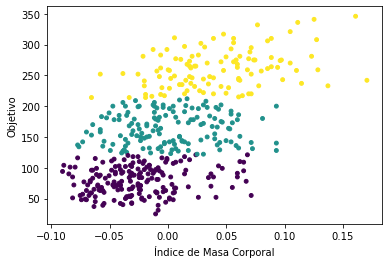

In [103]:
#K-medias
plt.figure()
plt.scatter(
    df_p.bmi, 
    df_p.target, 
    s = 15,
    c = kmeans.labels_
)
plt.xlabel('Índice de Masa Corporal')
plt.ylabel('Objetivo')
plt.show()

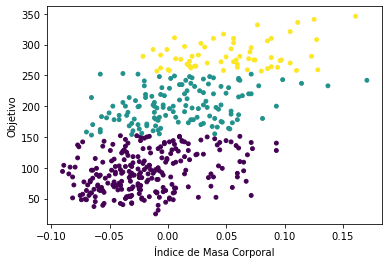

In [104]:
#Birch
plt.figure()
plt.scatter(
    df_p.bmi, 
    df_p.target, 
    s = 15,
    c = bclust.labels_
)
plt.xlabel('Índice de Masa Corporal')
plt.ylabel('Objetivo')
plt.show()

BIRCH es un método no supervisado utilizado para crear agrupaciones jerárquicas principalmente en bases de datos de gran tamaño. La mayor ventaja de BIRCH es su capacidad para crear agrupaciones de forma dinamica conforme se agrega nueva información en una cantidad reducida de tiempo.

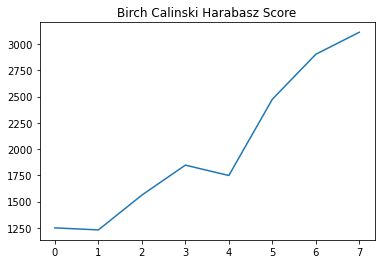

In [105]:
scores = []

for k in range(2,10):
    bclust_model = Birch(n_clusters=k ,branching_factor=200, threshold=1).fit(df_p)
    labels = bclust_model.labels_
    score = metrics.calinski_harabasz_score(df_p, labels)
    scores.append(score)
plt.title("Birch Calinski Harabasz Score")
plt.plot(scores)

C:\Users\alexi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alexi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\alexi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alexi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

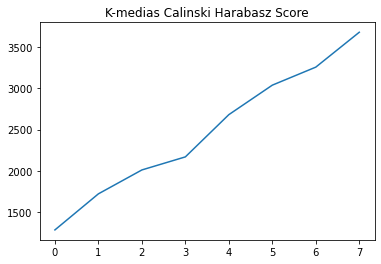

In [106]:
scores = []

for k in range(2,10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(df_p)
    labels = kmeans_model.labels_
    score = metrics.calinski_harabasz_score(df_p, labels)
    scores.append(score)
plt.title("K-medias Calinski Harabasz Score")
plt.plot(scores)

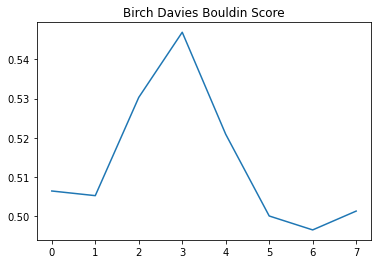

In [107]:
scores = []

for k in range(2,10):
    bclust_model = Birch(n_clusters=k ,branching_factor=200, threshold=1).fit(df_p)
    labels = bclust_model.labels_
    score = metrics.davies_bouldin_score(df_p,labels)
    scores.append(score)
plt.title("Birch Davies Bouldin Score")
plt.plot(scores)

C:\Users\alexi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alexi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\alexi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alexi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

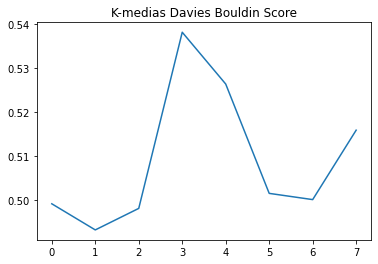

In [108]:
scores = []

for k in range(2,10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(df_p)
    labels = kmeans_model.labels_
    score = metrics.davies_bouldin_score(df_p,labels)
    scores.append(score)
plt.title("K-medias Davies Bouldin Score")
plt.plot(scores)

Se decidió dividir los datos en 3 clusters usando el método de agrupamiento de K-medias y referencia de Davies Bouldin Score debido a que muestra una mejor division para valores atípicos lo cual es una desventaja al usar BIRCH y el score muestra una clara definicion al llegar a 3 grupos por sobre otra opción.